# Parte 1 - Leitura do dataset e configurações iniciais

Importa as classes necessárias e monta o drive para acessar o arquivo de dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lê o arquivo com os dados e apresenta o dataframe

In [2]:
colunas = ['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca', 'resultado']
dados = pd.read_csv('datasets\\atv9.csv', names=colunas)
dados

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Atributos e valores:
1.  preco - Preço de venda:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.  
2.  manutencao - Custo de manutenção:
*  low - baixo;
*  med - médio;
*  high - alto;
*  vhigh - muito alto.
3.  portas - Quantidade de portas:
*  2 - duas;
*  3 - três;
*  4 - quatro;
*  5more - cinco ou mais.
4.  pessoas - Quantidade de pessoas:
*  2 - duas;
*  4 - quatro;
*  more - mais.
5.  bagageiro - Tamanho do bagageiro:
*  small - pequeno;
*  med - médio;
*  big - grande;
6.  segurança - Nível de segurança:
*  low - baixo;
*  med - médio;
*  high - alto.
7.  resultado' - Resultado sobre a análise do carro:
*  unacc - inaceitável;
*  acc - aceitável;
*  good - bom;
*  vgood - muito bom.

Transforma os valores qualitativos em codificações numéricas.

In [3]:
from sklearn.preprocessing import LabelEncoder

dados2 = dados.copy()
le = LabelEncoder()
dados2['preco']=le.fit_transform(dados['preco'])
dados2['manutencao']=le.fit_transform(dados['manutencao'])
dados2['portas']=le.fit_transform(dados['portas'])
dados2['pessoas']=le.fit_transform(dados['pessoas'])
dados2['bagageiro']=le.fit_transform(dados['bagageiro'])
dados2['seguranca']=le.fit_transform(dados['seguranca'])
dados2['resultado']=le.fit_transform(dados['resultado'])
dados2.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


1. Cria a matriz X com todos atributos, exceto o resultado;
2. Cria o vetor y com o atributo resultado;
3. Divide os dados em 33% para teste e 67% para treinamento.

In [4]:
from sklearn.model_selection import train_test_split

X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)

# Parte 2 - Exemplo - kNN

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       807
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       126
           1       0.39      0.43      0.41        21
           2       0.88      0.88      0.88       403
           3       0.48      0.52      0.50        21

    accuracy                           0.79       571
   macro avg       0.59      0.61      0.60       571
weighted avg       0.79      0.79      0.79       571



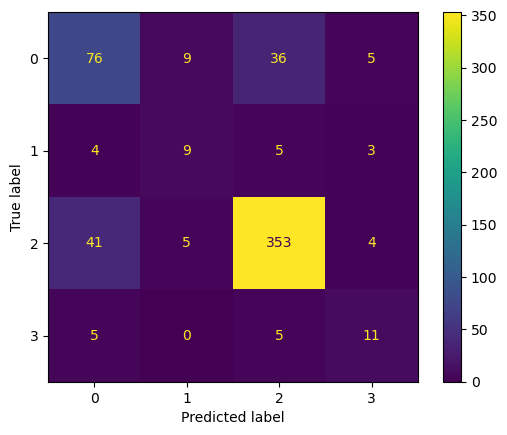

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

modelo = KNeighborsClassifier(n_neighbors=1)
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

# Parte 3 - Atividade

Outros atributos podem ser definidos na construção do modelo kNN, além de *n_neighbors*, que recebe um número inteiro positivo que indica quantos vizinhos devem ser considerados na definição da classe. Dentre eles destacam-se:

*   *weights*: indica como se define o peso de cada vizinho mais próximo na definição do resultado. Os valores possíveis são *uniform* e *distance*, sendo o primeiro o valor default.
*   *p*: potência aplicada no cálculo da distância de Minkowski, um número em ponto flutuante sendo 2 o valor default (distância euclidiana).
*   algorithm: algoritmo utilizado para encontrar os pontos mais próximos. Os valores possíveis são *auto*, *ball_tree*, *kd_tree*, *brute*, sendo *auto* o valor default.

Elabore um código que teste automaticamente os diferentes valores dos parâmetros listadas abaixo e apresente a acurácia para o conjunto de teste de cada uma delas.


1) n_neighbors: 1 a 20 mantendo os demais parâmetros com os valores padrão.

In [6]:
for i in range(1,21):
    modelo = KNeighborsClassifier(n_neighbors=i)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(f"Acurácia para k={i}: {acuracia:.4f}")

Acurácia para k=1: 0.7863
Acurácia para k=2: 0.7338
Acurácia para k=3: 0.8284
Acurácia para k=4: 0.8144
Acurácia para k=5: 0.9037
Acurácia para k=6: 0.9159
Acurácia para k=7: 0.9124
Acurácia para k=8: 0.9002
Acurácia para k=9: 0.9089
Acurácia para k=10: 0.8897
Acurácia para k=11: 0.8792
Acurácia para k=12: 0.8651
Acurácia para k=13: 0.8634
Acurácia para k=14: 0.8371
Acurácia para k=15: 0.8371
Acurácia para k=16: 0.8406
Acurácia para k=17: 0.8231
Acurácia para k=18: 0.8249
Acurácia para k=19: 0.8196
Acurácia para k=20: 0.8109


2) p: 1 a 5. Teste com o valor de n_neighbor que gerou o melhor resultado no experimento anterior.

In [7]:
for i in range(1, 6):
    modelo = KNeighborsClassifier(n_neighbors=6, p=i)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(f"Acurácia para p={i}: {acuracia:.4f}")

Acurácia para p=1: 0.9142
Acurácia para p=2: 0.9159
Acurácia para p=3: 0.9124
Acurácia para p=4: 0.9124
Acurácia para p=5: 0.9124


3. weights: altere o valor para *distance*. Teste com os valores de n_neighbor e p que geraram os melhores resultados no experimento anterior.

Acurácia para weights=distance: 0.9124

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       807
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       126
           1       0.80      0.57      0.67        21
           2       0.94      0.99      0.96       403
           3       1.00      0.67      0.80        21

    accuracy                           0.92       571
   macro avg       0.90      0.76      0.81       571
weighted avg       0.92      0.92      0.92       571



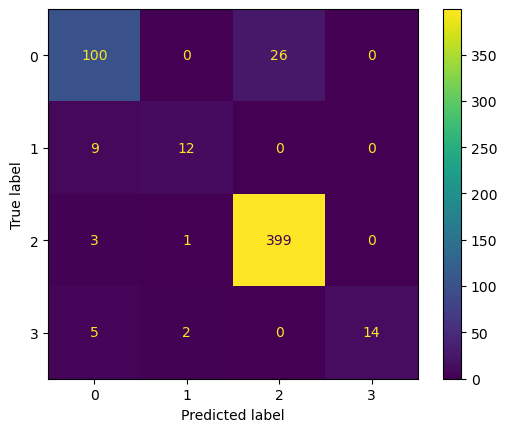

In [8]:
modelo = KNeighborsClassifier(n_neighbors=6, p=2, weights='distance')
modelo.fit(X_train, y_train)

acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia para weights=distance: {acuracia:.4f}")

y_pred_train = modelo.predict(X_train)
print("\nRelatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

4) algorithm: teste com os quatro valores possíveis para este parâmetro. Teste com os valores de n_neighbor, p e weights que geraram os melhores resultados no experimento anterior.

In [9]:
algorithms_parameters: list = ["ball_tree", "kd_tree", "brute", "auto"]

for param in algorithms_parameters:
    modelo = KNeighborsClassifier(n_neighbors=6, p=2, weights='distance', algorithm=param)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    print(f"Acurácia para algorithm={param}: {acuracia:.4f}")

Acurácia para algorithm=ball_tree: 0.9212
Acurácia para algorithm=kd_tree: 0.9194
Acurácia para algorithm=brute: 0.9282
Acurácia para algorithm=auto: 0.9194


**O melhor modelo:**

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00       807
           3       1.00      1.00      1.00        44

    accuracy                           1.00      1157
   macro avg       1.00      1.00      1.00      1157
weighted avg       1.00      1.00      1.00      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       126
           1       0.78      0.67      0.72        21
           2       0.95      0.98      0.96       403
           3       1.00      0.71      0.83        21

    accuracy                           0.93       571
   macro avg       0.90      0.80      0.84       571
weighted avg       0.93      0.93      0.93       571



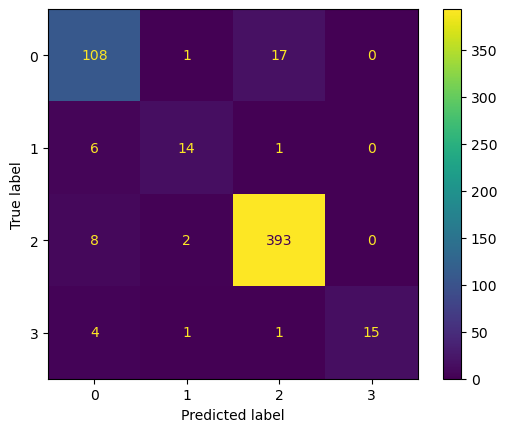

In [10]:
modelo = KNeighborsClassifier(n_neighbors=6, p=2, weights='distance', algorithm='brute')
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()